Amalia Carbonell 

Analisis de datos participantes camp XR 1-5

In [2]:
import pandas as pd

In [3]:
df_completo  = pd.read_excel("ParticipantesCampXR.xlsx")

In [4]:
df_completo.head()

,Nombres y apellidos (completos),Tipo de Identificación,Número de Identificación,Adjunte el documento de identificación escaneado por ambos lados. Pasaporte para los extranjeros (Ps) y cédula para los locales (CC),Fecha de nacimiento (formato DD/MM/AAAA),Sexo,Nacionalidad con la que ingresa al Pais,Profesión,Empresa / Universidad,Cargo,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Julián David Suarez Rendón,Cédula de ciudadanía,1001477938,NaN,2001-09-11 00:00:00,Masculino,Colombiano,Ing. Sistemas,Fundación Universitaria Católica del Norte,Desarrollador de software,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daniel Felipe Agudelo Molina,Cédula de ciudadanía,1036610358,NaN,09/28/1987,Masculino,Colombiano,Ingeniero informático,Fundación Universitaria Católica del Norte,Desarrollador Web,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cristian David Pacheco Rojano,Cédula de ciudadanía,1048328514,NaN,07/13/1998,Masculino,Colombiano,Ingeniero de sistemas,Fundación Universitaria Católica del Norte,Desarrollador de software,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Johany Armando Carreño Gamboa,Cédula de ciudadanía,91479573,NaN,1975-02-09 00:00:00,Masculino,Colombiano,Ingeniero de Sistemas,Fundación Universitaria Católica del Norte,Coordinador General Unidad de Ingeniería y TI ...,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Samuel Rendón Rodríguez,Cédula de ciudadanía,1107838218,NaN,01/27/2005,Masculino,Colombiano,Estudiante de ingenieria,Universidad De San Buenaventura Cali - Cartagena,Estudiante Ingeniería Multimedia,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df= df_completo[[
    "Fecha de nacimiento (formato DD/MM/AAAA)",
    "Sexo",
    "Nacionalidad con la que ingresa al Pais",
    "Empresa / Universidad",
    "Profesión",
    "Cargo",
    "Ciudad y dirección de correspondencia"
]]

In [7]:
df.describe()

,Fecha de nacimiento (formato DD/MM/AAAA),Sexo,Nacionalidad con la que ingresa al Pais,Empresa / Universidad,Profesión,Cargo,Ciudad y dirección de correspondencia
count,146,146,146,146,146,145,146
unique,145,4,4,72,95,87,144
top,02/23/1992,Masculino,Colombiana,Universidad De San Buenaventura Cali - Cartagena,Estudiante,Estudiante,Medellín
freq,2,75,115,6,22,20,2


Creamos un identificador unico para cada uno de los participantes, para poder anonimizarlos. 
Se renombran las columnas para tener nombres mas cortos y claros.

In [8]:
df.insert(0, "ID", range(1, len(df) + 1)) 

df = df.rename(columns={
    "Fecha de nacimiento (formato DD/MM/AAAA)": "FechaNacimiento",
    "Sexo": "Sexo",
    "Nacionalidad con la que ingresa al Pais": "Nacionalidad",
    "Empresa / Universidad": "Empresa_Universidad",
    "Cargo": "Cargo",
    "Ciudad y dirección de correspondencia": "Ciudad"
})



In [9]:
df.head()


,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad
0,1,2001-09-11 00:00:00,Masculino,Colombiano,Fundación Universitaria Católica del Norte,Ing. Sistemas,Desarrollador de software,Rionegro Antioquia - Calle 40E #75-51
1,2,09/28/1987,Masculino,Colombiano,Fundación Universitaria Católica del Norte,Ingeniero informático,Desarrollador Web,Medellín calle 65 aa # 41-25 interior 501 Vill...
2,3,07/13/1998,Masculino,Colombiano,Fundación Universitaria Católica del Norte,Ingeniero de sistemas,Desarrollador de software,"Riohacha, Carrera 7K#34-67, Piso 2 - apartamen..."
3,4,1975-02-09 00:00:00,Masculino,Colombiano,Fundación Universitaria Católica del Norte,Ingeniero de Sistemas,Coordinador General Unidad de Ingeniería y TI ...,"Fundación Universitaria Católica del Norte, Qu..."
4,5,01/27/2005,Masculino,Colombiano,Universidad De San Buenaventura Cali - Cartagena,Estudiante de ingenieria,Estudiante Ingeniería Multimedia,Cali. Cra 76c #2b-27


# Limpieza de los datos
Analizar variables Sexo y Nacionalidad para revisar que los valores sean permitidos. 



In [10]:
print(df["Sexo"].unique())
print(df["Nacionalidad"].unique())


['Masculino\xa0' 'Femenino\xa0' 'Femenino' 'Masculino']
['Colombiano' 'Colombiana' 'Mexicano\xa0' 'Peruana']


Podemos ver valores con espacios invisibles, se van a eliminar para estandarizar las respuestas en ambos casos. 

In [11]:
#Normalizacion Sexo, eliminar espacios invisibles y todas con la primera letra en mayuscula
df["Sexo"] = (
    df["Sexo"]
    .str.strip()        
    .str.capitalize()   
)


# Normalizacion Nacionalidad, eliminar espacios y todos con mayuscula la primera letra
df["Nacionalidad"] = (
    df["Nacionalidad"]
    .str.strip()
    .str.capitalize()
)

# Reemplazamos valores equivalentes, colombiano y colombiana se vuelven colombiano. 
df["Nacionalidad"] = df["Nacionalidad"].replace({
    "Colombiano": "Colombiana"
})


In [12]:
print(df["Sexo"].unique())
print(df["Nacionalidad"].unique())


['Masculino' 'Femenino']
['Colombiana' 'Mexicano' 'Peruana']


<Axes: xlabel='Sexo'>

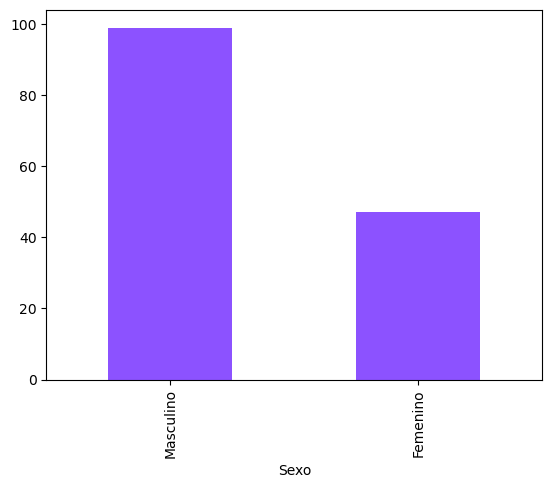

In [54]:
df["Sexo"].value_counts().plot(kind="bar", color='#8c52ff')

La grafica nos muestra la distribucion entro hombres y mujeres participantes de algun camp XR

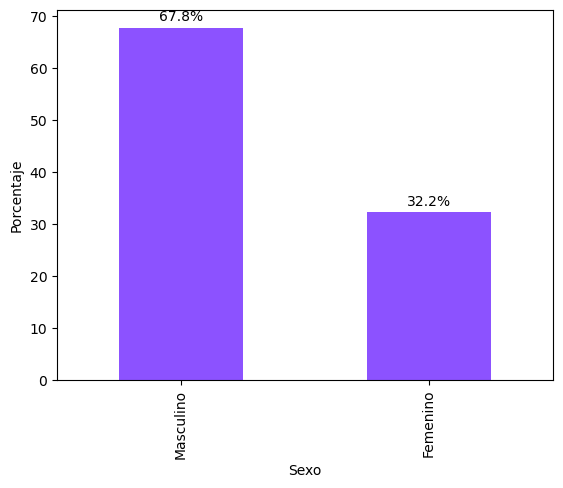

In [55]:
import matplotlib.pyplot as plt

# Conteo y porcentaje
counts = df["Sexo"].value_counts()
percentages = (counts / counts.sum()) * 100

ax = percentages.plot(kind="bar", color='#8c52ff')

# Agregar porcentajes encima de cada barra
for i, v in enumerate(percentages):
    ax.text(i, v + 0.02 * max(percentages), f"{v:.1f}%", ha='center')

plt.ylabel("Porcentaje")
plt.show()



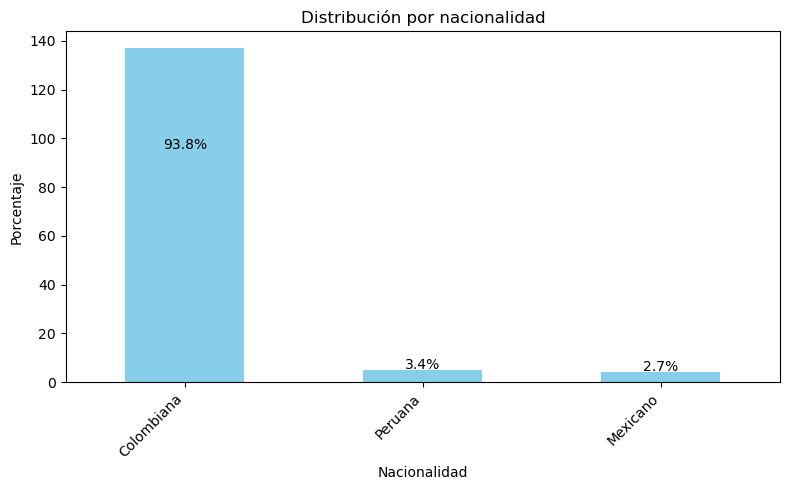

In [15]:
df["Nacionalidad"].value_counts().plot(kind="bar", color='skyblue')
import matplotlib.pyplot as plt

counts = df["Nacionalidad"].value_counts()
percentages = (counts / counts.sum()) * 100

ax = percentages.plot(kind="bar", color='skyblue', figsize=(8,5))

# Agregar texto de porcentaje
for i, v in enumerate(percentages):
    ax.text(i, v + 0.02 * max(percentages), f"{v:.1f}%", ha='center')

plt.ylabel("Porcentaje")
plt.title("Distribución por nacionalidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


La grafica nos muestra la cantidad de participantes segun la nacionalidad que tengan. 

Para poder ver sus lugares de origen con mayor detalle, se extraera la ciudad de donde son del mensaje de direccion y ciudad. Se seleccionaron las ciudades que ingresaron en las respuestas y se elimino la direccion para no tener datos personales de las personas. Se almaceno unicamente la ciudad del participante. 

In [16]:
import re
import unicodedata

def normalizar(texto):
    # Quitar tildes y pasar a minúsculas
    texto = texto.lower()
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )
    return texto

def extraer_ciudad(texto):
    if pd.isnull(texto):
        return None
    
    texto = normalizar(texto)
    
    ciudades = [
        "medellin", "cali", "bogota", "cartagena", "barranquilla",
        "rionegro", "riohacha", "jamundi", "popayan", "santa marta",
        "armenia", "maicao", "tunja", "tulua", "soledad", "sogamoso",
        "manizales", "ibague", "itagui", "bello", "florencia", "cucuta",
        "villa del rosario", "sabanalarga", "chia", "andalucia",
        "guadalajara de buga", "zacatecas", "huancayo", "valledupar" , "girardot" , "quindio", "boyaca"
    ]
    
    for ciudad in ciudades:
        if re.search(rf"\b{ciudad}\b", texto):
            return ciudad.capitalize()
    return "Otra/Desconocida"

df["Ciudad"] = df["Ciudad"].apply(extraer_ciudad)



In [17]:
df["Ciudad"].head(150)


0      Rionegro
1      Medellin
2      Riohacha
3      Medellin
4          Cali
         ...   
141      Bogota
142      Bogota
143      Bogota
144      Bogota
145      Bogota
Name: Ciudad, Length: 146, dtype: object

In [18]:
df["Ciudad"].value_counts()

Ciudad
Bogota                 22
Cali                   22
Medellin               19
Barranquilla            8
Santa marta             5
Ibague                  5
Florencia               5
Valledupar              5
Popayan                 5
Huancayo                5
Zacatecas               4
Maicao                  4
Tulua                   3
Armenia                 3
Sogamoso                3
Cucuta                  3
Itagui                  2
Bello                   2
Villa del rosario       2
Soledad                 2
Rionegro                2
Quindio                 2
Cartagena               2
Riohacha                2
Boyaca                  1
Manizales               1
Andalucia               1
Tunja                   1
Guadalajara de buga     1
Girardot                1
Sabanalarga             1
Jamundi                 1
Chia                    1
Name: count, dtype: int64

<Axes: xlabel='Ciudad'>

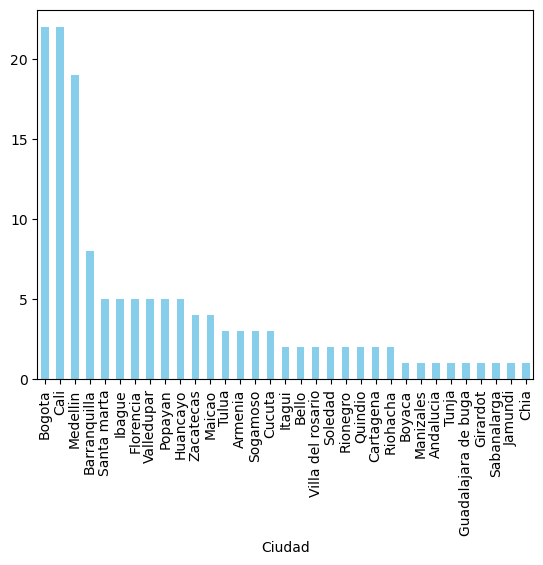

In [19]:
df["Ciudad"].value_counts().plot(kind="bar", color='skyblue')

In [20]:
mapa_departamentos = {
    # Bogotá y Cundinamarca
    "Bogota": "Cundinamarca",
    "Chia": "Cundinamarca",
    "Girardot": "Cundinamarca",

    # Valle del Cauca
    "Cali": "Valle del Cauca",
    "Jamundi": "Valle del Cauca",
    "Tulua": "Valle del Cauca",
    "Guadalajara de buga": "Valle del Cauca",
    "Andalucia": "Valle del Cauca",

    # Antioquia
    "Medellin": "Antioquia",
    "Rionegro": "Antioquia",
    "Bello": "Antioquia",
    "Itagui": "Antioquia",
    "Sabanalarga": "Antioquia",

    # Costa Caribe
    "Cartagena": "Bolívar",
    "Barranquilla": "Atlántico",
    "Soledad": "Atlántico",
    "Santa marta": "Magdalena",
    "Riohacha": "La Guajira",
    "Maicao": "La Guajira",

    # Otros departamentos
    "Ibague": "Tolima",
    "Armenia": "Quindio",
    "Popayan": "Cauca",
    "Cucuta": "Norte de Santander",
    "Villa del rosario": "Norte de Santander",
    "Tunja": "Boyacá",
    "Sogamoso": "Boyacá",
    "Manizales": "Caldas",
    "Florencia": "Caquetá",
    "Valledupar": "Cesar",
    "Quindio": "Quindio",
    "Boyaca": "Boyacá",

    # Extranjeros
    "Zacatecas": "México",
    "Huancayo": "Perú"
}

# Crear columna nueva
df["Region"] = df["Ciudad"].map(mapa_departamentos).fillna("Otro/No identificado")




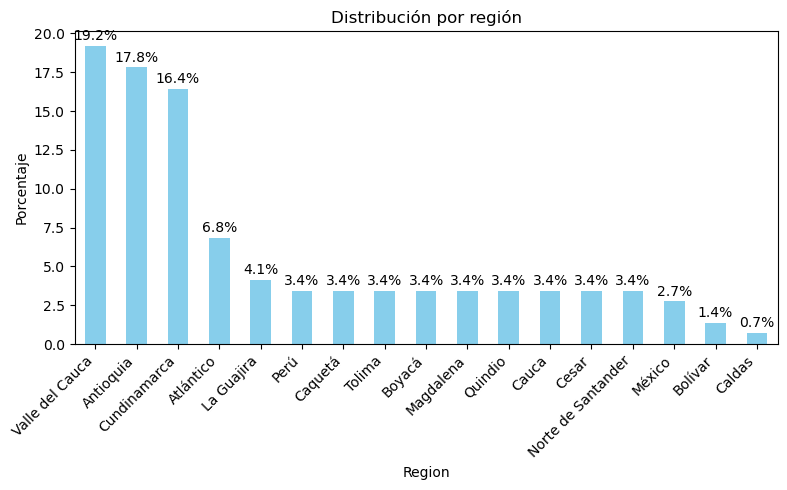

In [ ]:
import matplotlib.pyplot as plt

# Conteo y porcentaje
counts = df["Region"].value_counts()
percentages = (counts / counts.sum()) * 100

plt.figure(figsize=(8,5))
ax = percentages.plot(kind="bar", color='skyblue')

# Agregar etiquetas de porcentaje encima de cada barra 
for i, v in enumerate(percentages):
    ax.text(i, v + 0.02 * max(percentages), f"{v:.1f}%", ha='center')

plt.ylabel("Porcentaje")
plt.title("Distribución por región")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



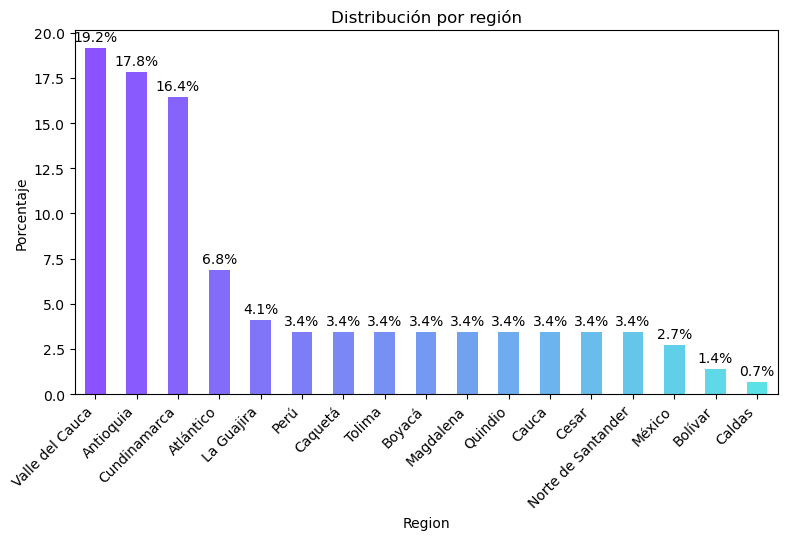

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generar degradé entre #8c52ff y #5ce1e6 tantas veces como categorías haya
def generar_degrade_hex(hex1, hex2, n):
    # Pasa de hex a RGB
    c1 = np.array([int(hex1[i:i+2], 16) for i in (1,3,5)])
    c2 = np.array([int(hex2[i:i+2], 16) for i in (1,3,5)])
    # Interpolar
    colores = [(c1 + (c2 - c1) * t).astype(int) for t in np.linspace(0, 1, n)]
    # Pasa de RGB → hex
    return ['#%02x%02x%02x' % tuple(c) for c in colores]

# Paleta XR del degradé
colores_region = generar_degrade_hex("#8c52ff", "#5ce1e6", len(df["Region"].value_counts()))

# Conteo y porcentaje
counts = df["Region"].value_counts()
percentages = (counts / counts.sum()) * 100

plt.figure(figsize=(8,5))

ax = percentages.plot(kind="bar", color=colores_region)

# Agregar etiquetas de porcentaje encima de cada barra
for i, v in enumerate(percentages):
    ax.text(i, v + 0.02 * max(percentages), f"{v:.1f}%", ha='center')

plt.ylabel("Porcentaje")
plt.title("Distribución por región")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()


In [23]:
df.head(29)

,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad,Region
0,1,2001-09-11 00:00:00,Masculino,Colombiana,Fundación Universitaria Católica del Norte,Ing. Sistemas,Desarrollador de software,Rionegro,Antioquia
1,2,09/28/1987,Masculino,Colombiana,Fundación Universitaria Católica del Norte,Ingeniero informático,Desarrollador Web,Medellin,Antioquia
2,3,07/13/1998,Masculino,Colombiana,Fundación Universitaria Católica del Norte,Ingeniero de sistemas,Desarrollador de software,Riohacha,La Guajira
3,4,1975-02-09 00:00:00,Masculino,Colombiana,Fundación Universitaria Católica del Norte,Ingeniero de Sistemas,Coordinador General Unidad de Ingeniería y TI ...,Medellin,Antioquia
4,5,01/27/2005,Masculino,Colombiana,Universidad De San Buenaventura Cali - Cartagena,Estudiante de ingenieria,Estudiante Ingeniería Multimedia,Cali,Valle del Cauca
5,6,2004-05-07 00:00:00,Masculino,Colombiana,Universidad De San Buenaventura Cali - Cartagena,Estudiante,Estudiante Ingeniería Multimedia,Cali,Valle del Cauca
6,7,2001-07-12 00:00:00,Masculino,Colombiana,Universidad De San Buenaventura Cali - Cartagena,Estudiante (Ingeniero de Sistemas),Estudiante Ingeniería de Sistemas,Cali,Valle del Cauca
7,8,09-25-2003,Masculino,Colombiana,Universidad De San Buenaventura Cali - Cartagena,Estudiante de Ingenieria Multimedia,Estudiante Ingeniería Multimedia,Cartagena,Bolívar
8,9,1997-04-03 00:00:00,Femenino,Colombiana,Universidad De San Buenaventura Cali - Cartagena,Ingeniera Multimedia,Docente,Jamundi,Valle del Cauca
9,10,1985-12-02 00:00:00,Masculino,Colombiana,Universidad De San Buenaventura Cali - Cartagena,Ingeniero Electrónico,Docente,Cartagena,Bolívar


In [ ]:
from datetime import datetime

# Convertir fechas de nacimiento en fechas y no string 
df["FechaNacimiento"] = pd.to_datetime(df["FechaNacimiento"], errors="coerce")

# Crear la columna FechaCamp vacía
df["FechaCamp"] = pd.NaT  

fechas_camp = {
    (1,29): datetime(2023,10,4),   # campamento 1
    (30,57): datetime(2023,7,24),  # campamento 2
    (58,87): datetime(2022,11,27), # campamento 3
    (88,114): datetime(2023,5,6),  # campamento 4
    (115,146): datetime(2024,8,12) # campamento 5
}


for (inicio, fin), fecha in fechas_camp.items():
    df.loc[df["ID"].between(inicio, fin), "FechaCamp"] = fecha

# Calcular edad
def calcular_edad(nacimiento, camp):
    if pd.isnull(nacimiento) or pd.isnull(camp):
        return None
    return camp.year - nacimiento.year - ((camp.month, camp.day) < (nacimiento.month, nacimiento.day))

df["EdadEnCamp"] = df.apply(lambda r: calcular_edad(r.FechaNacimiento, r.FechaCamp), axis=1)



In [25]:
df[["FechaNacimiento","FechaCamp","EdadEnCamp"]]

,FechaNacimiento,FechaCamp,EdadEnCamp
0,2001-09-11,2023-10-04,22
1,1987-09-28,2023-10-04,36
2,1998-07-13,2023-10-04,25
3,1975-02-09,2023-10-04,48
4,2005-01-27,2023-10-04,18
...,...,...,...
141,2004-02-07,2024-08-12,20
142,2002-11-16,2024-08-12,21
143,1978-11-03,2024-08-12,45
144,2002-07-27,2024-08-12,22


<Axes: xlabel='EdadEnCamp'>

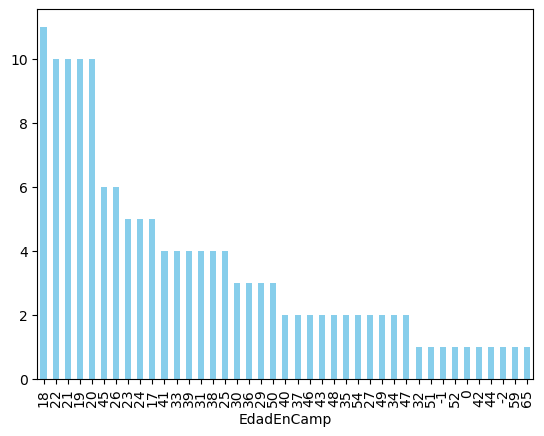

In [26]:
df["EdadEnCamp"].value_counts().plot(kind="bar", color='skyblue')

<Axes: xlabel='EdadEnCamp'>

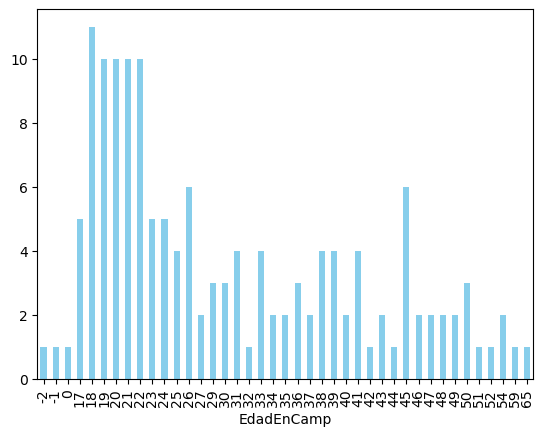

In [27]:
df["EdadEnCamp"].value_counts().sort_index().plot(kind="bar", color='skyblue')

### Corregir fechas de nacimiento mal puestas

Esta persona puso la fecha de nacimiento mal. Su fecha de nacimiento como esta en su documento de identidad es Junio 25 2006. Tambien se asume que esta mal su cargo, si profesion es estudiante, cargo no es profesor. 

In [28]:
df[df["EdadEnCamp"] == -2]

,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad,Region,FechaCamp,EdadEnCamp
112,113,2024-06-25,Femenino,Colombiana,La gran Colombia,Estudiante,Profesor,Bogota,Cundinamarca,2023-05-06,-2


In [29]:
# Corregir la fecha de nacimiento de la persona con ID 113
df.loc[df["ID"] == 113, "FechaNacimiento"] = "2006-06-25"

# Asegurarte de que siga siendo datetime
df["FechaNacimiento"] = pd.to_datetime(df["FechaNacimiento"], errors="coerce")

# Recalcular la edad en campamento
df["EdadEnCamp"] = df.apply(lambda r: calcular_edad(r.FechaNacimiento, r.FechaCamp), axis=1)
df[df["ID"] == 113]


,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad,Region,FechaCamp,EdadEnCamp
112,113,2006-06-25,Femenino,Colombiana,La gran Colombia,Estudiante,Profesor,Bogota,Cundinamarca,2023-05-06,16


Esta persona puso la fecha de nacimiento mal. Su fecha de nacimiento como esta en su documento de identidad es Noviembre 22 2004 Tambien se asume que esta mal su cargo, si profesion es estudiante, cargo no es docente. 

In [30]:
df[df["EdadEnCamp"] == -1]

,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad,Region,FechaCamp,EdadEnCamp
74,75,2023-11-22,Femenino,Colombiana,Universidad del Norte,Estudiante de Comunicación Social y Periodismo,Docente,Barranquilla,Atlántico,2022-11-27,-1


In [31]:
# Corregir la fecha de nacimiento de la persona con ID 75
df.loc[df["ID"] == 75, "FechaNacimiento"] = "2004-11-21"

# Asegurarte de que siga siendo datetime
df["FechaNacimiento"] = pd.to_datetime(df["FechaNacimiento"], errors="coerce")

# Recalcular la edad en campamento
df["EdadEnCamp"] = df.apply(lambda r: calcular_edad(r.FechaNacimiento, r.FechaCamp), axis=1)
df[df["ID"] == 75]

,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad,Region,FechaCamp,EdadEnCamp
74,75,2004-11-21,Femenino,Colombiana,Universidad del Norte,Estudiante de Comunicación Social y Periodismo,Docente,Barranquilla,Atlántico,2022-11-27,18


Esta persona puso la fecha de nacimiento mal. Su fecha de nacimiento como esta en su documento de identidad es Agosto 16 1985.  

In [32]:
df[df["EdadEnCamp"] == -0]

,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad,Region,FechaCamp,EdadEnCamp
44,45,2022-08-16,Masculino,Colombiana,Universidad Nacional Abierta y a Distancia,Ingeniero de Sonido,Líder de Cadena de formación en Multimedia,Bogota,Cundinamarca,2023-07-24,0


In [33]:
# Corregir la fecha de nacimiento de la persona con ID 75
df.loc[df["ID"] == 45, "FechaNacimiento"] = "1985-08-16"

# Asegurarte de que siga siendo datetime
df["FechaNacimiento"] = pd.to_datetime(df["FechaNacimiento"], errors="coerce")

# Recalcular la edad en campamento
df["EdadEnCamp"] = df.apply(lambda r: calcular_edad(r.FechaNacimiento, r.FechaCamp), axis=1)
df[df["ID"] == 45]

,ID,FechaNacimiento,Sexo,Nacionalidad,Empresa_Universidad,Profesión,Cargo,Ciudad,Region,FechaCamp,EdadEnCamp
44,45,1985-08-16,Masculino,Colombiana,Universidad Nacional Abierta y a Distancia,Ingeniero de Sonido,Líder de Cadena de formación en Multimedia,Bogota,Cundinamarca,2023-07-24,37


### Grafica de edades coorectas ordenada 

<Axes: xlabel='EdadEnCamp'>

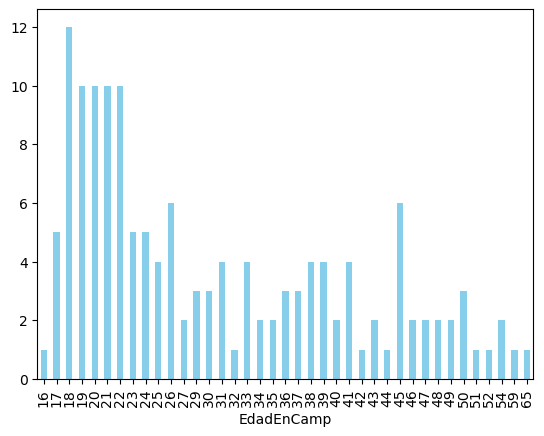

In [34]:
df["EdadEnCamp"].value_counts().sort_index().plot(kind="bar", color='skyblue')


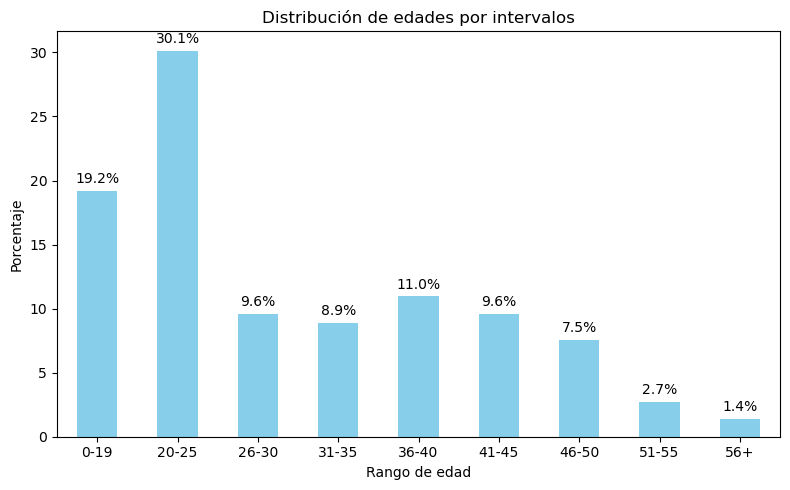

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir intervalos y etiquetas
bins = [0, 19, 25, 30, 35, 40, 45, 50, 55 , 100]
labels = ['0-19', '20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56+']

# Conteo por intervalos
conteo_edades = pd.cut(
    df['EdadEnCamp'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
).value_counts().sort_index()

# Convertir a porcentaje
porcentajes_edades = (conteo_edades / conteo_edades.sum()) * 100

plt.figure(figsize=(8,5))
ax = porcentajes_edades.plot(kind='bar', color='skyblue')

# Agregar texto de porcentaje encima de cada barra
for i, v in enumerate(porcentajes_edades):
    ax.text(i, v + 0.02 * max(porcentajes_edades), f"{v:.1f}%", ha='center')

plt.title('Distribución de edades por intervalos')
plt.xlabel('Rango de edad')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




Distribución de los cargos en la muestra:

45.2% corresponden a docentes.
32.9% corresponden a estudiantes.
16.4% corresponden a administrativos.
3.4% corresponden a desarrolladors.
1.4% corresponden a investigadors.
0.7% corresponden a otros.


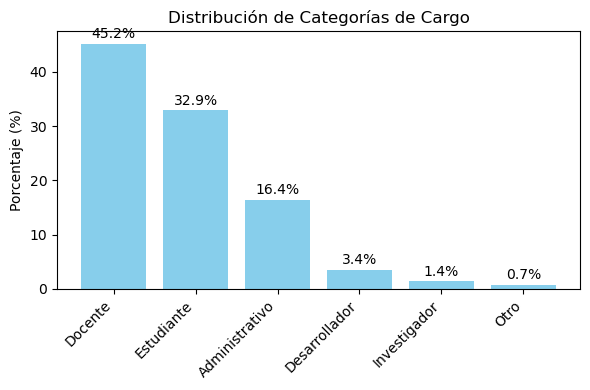

In [46]:


def clasificar_cargo(cargo):
    # Convertir a string para evitar errores con floats o NaN
    cargo_str = str(cargo).lower()

    if any(p in cargo_str for p in ['estudiante', 'aprendiz', 'monitor', 'pasante', 'participante', 'NaN']): #se incluye nan porque en los datos esta persona puso profesion estudiante y dejo cargo en blanco
        return 'Estudiante'
    elif any(p in cargo_str for p in ['docente', 'profesor', 'instructor', 'cátedra', 'asistente de investigación', 'ingeniero', 'ingeniera']):
        return 'Docente'
    elif any(p in cargo_str for p in ['coordinador', 'director', 'vicerrector', 'decano', 'decana', 'jefe', 'líder']):
        return 'Administrativo'
    elif any(p in cargo_str for p in ['desarrollador', 'ingeniero de software', 'programador', 'game', 'designer','apoyar']):
        return 'Desarrollador'
    elif any(p in cargo_str for p in ['investigador', 'investigación']):
        return 'Investigador'
    else:
        return 'Otro'

# Crear la nueva columna con categorías 
df['Categoria_cargo'] = df['Cargo'].apply(clasificar_cargo)

# Calcular distribución en porcentaje 
dist = df['Categoria_cargo'].value_counts(normalize=True) * 100

# Mostrar resumen en texto 
print("Distribución de los cargos en la muestra:\n")
for categoria, porcentaje in dist.items():
    print(f"{porcentaje:.1f}% corresponden a {categoria.lower()}s.")

# Graficar 
plt.figure(figsize=(6, 4))
plt.bar(dist.index, dist.values, color='skyblue')
plt.title('Distribución de Categorías de Cargo')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')

# Agregar los porcentajes encima de cada barra
for i, v in enumerate(dist.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [37]:
otros = df[df['Categoria_cargo'] == 'Otro'][['Cargo']]
otros


,Cargo
23,NaN


Distribución de los cargos en la muestra:

45.2% corresponden a docentes.
32.9% corresponden a estudiantes.
16.4% corresponden a administrativos.
3.4% corresponden a desarrolladors.
1.4% corresponden a investigadors.
0.7% corresponden a otros.


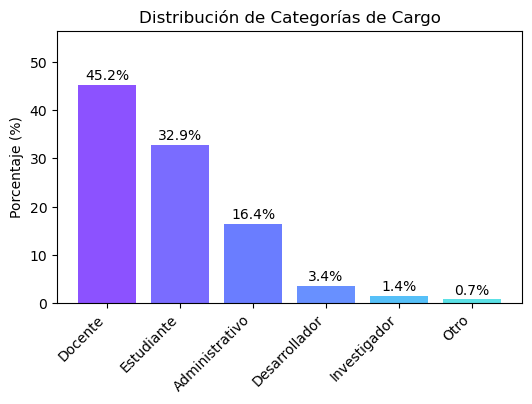

In [53]:
import matplotlib.pyplot as plt

def clasificar_cargo(cargo):
    # Convertir a string para evitar errores con floats o NaN
    cargo_str = str(cargo).lower()

    if any(p in cargo_str for p in ['estudiante', 'aprendiz', 'monitor', 'pasante', 'participante', 'NaN']): #se incluye nan porque en los datos esta persona puso profesion estudiante y dejo cargo en blanco
        return 'Estudiante'
    elif any(p in cargo_str for p in ['docente', 'profesor', 'instructor', 'cátedra', 'asistente de investigación', 'ingeniero', 'ingeniera']):
        return 'Docente'
    elif any(p in cargo_str for p in ['coordinador', 'director', 'vicerrector', 'decano', 'decana', 'jefe', 'líder']):
        return 'Administrativo'
    elif any(p in cargo_str for p in ['desarrollador', 'ingeniero de software', 'programador', 'game', 'designer','apoyar']):
        return 'Desarrollador'
    elif any(p in cargo_str for p in ['investigador', 'investigación']):
        return 'Investigador'
    else:
        return 'Otro'

# Crear la nueva columna con categorías 
df['Categoria_cargo'] = df['Cargo'].apply(clasificar_cargo)

# Calcular distribución en porcentaje 
dist = df['Categoria_cargo'].value_counts(normalize=True) * 100

# 🔹 Asegurar que 'Otro' exista aunque sea 0%
if 'Otro' not in dist.index:
    dist.loc['Otro'] = 0.0

# 🔹 Paleta de 6 colores (mismos de antes)
colores_6 = [
     "#8c52ff",
    "#7a6cff",
    "#6a7dff",
    "#6890ff",  # Lavanda azul
    "#56c0f8",  # Azul brillante
    "#5ce1e6"   # Turquesa final
]

# Asignar un color a cada barra en el orden actual de dist
colors_used = [colores_6[i % len(colores_6)] for i in range(len(dist))]

# Mostrar resumen en texto 
print("Distribución de los cargos en la muestra:\n")
for categoria, porcentaje in dist.items():
    print(f"{porcentaje:.1f}% corresponden a {categoria.lower()}s.")

# Graficar 
plt.figure(figsize=(6, 4))
plt.bar(dist.index, dist.values, color=colors_used)  # ⬅️ aquí cambiamos el color
plt.title('Distribución de Categorías de Cargo')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')

# Agregar los porcentajes encima de cada barra
for i, v in enumerate(dist.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')

plt.title('Distribución de Categorías de Cargo')


plt.subplots_adjust(bottom=0.2)
plt.ylim(0, dist.values.max() * 1.25)

plt.show()


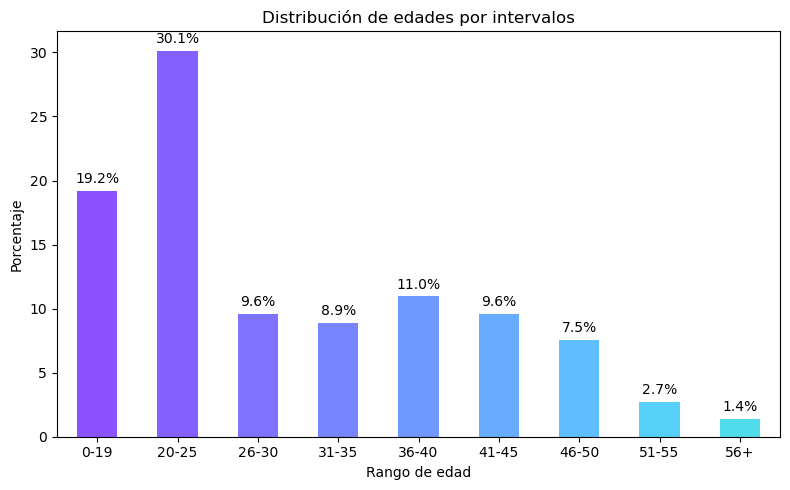

In [58]:
# Definir intervalos y etiquetas
bins = [0, 19, 25, 30, 35, 40, 45, 50, 55 , 100]
labels = ['0-19', '20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56+']


colores_6 = [

    "#8c52ff",
    "#865fff",
    "#7e73ff",
    "#7786ff",
    "#6f99ff",
    "#67acff",
    "#5fbeff",
    "#56d0f8",
    "#50dcea",
    "#55dfe4",
    "#5ce1e6"
]

# Conteo por intervalos
conteo_edades = pd.cut(
    df['EdadEnCamp'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
).value_counts().sort_index()

# Convertir a porcentaje
porcentajes_edades = (conteo_edades / conteo_edades.sum()) * 100

plt.figure(figsize=(8,5))

# Colores: reciclamos la paleta de 6
colors_edades = [colores_6[i % len(colores_6)] for i in range(len(porcentajes_edades))]

ax = porcentajes_edades.plot(kind='bar', color=colors_edades)

for i, v in enumerate(porcentajes_edades):
    ax.text(i, v + 0.02 * max(porcentajes_edades), f"{v:.1f}%", ha='center')

plt.title('Distribución de edades por intervalos')
plt.xlabel('Rango de edad')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [66]:
pip install pillow numpy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from PIL import Image
import numpy as np
import os



carpeta_fotos = "/Users/amaliacarbonell/Desktop/fotos" # !!!! La ruta del las imagenes esta definida aca, se tiene que cambiar. 
foto_objetivo = "/Users/amaliacarbonell/Desktop/FotoObj2.png"
tam_celda = 33  # tamaño de cada mini-foto. Si se pone muy bajita la resolucion de la imagen grande se pierde pero muy grande las chiquitas no se ven.

max_usos_por_foto = 2      # después de usar todas, se puede repetir hasta este límite
beta = 0.6                 # tinte hacia la foto objetivo 

# Cargar todas las fotos pequeñas

thumbnails = []
for archivo in os.listdir(carpeta_fotos):
    if archivo.lower().endswith((".jpg", ".jpeg", ".png")):
        ruta = os.path.join(carpeta_fotos, archivo)
        img = Image.open(ruta).convert("RGB")
        img = img.resize((tam_celda, tam_celda))
        thumbnails.append(np.array(img))

if len(thumbnails) == 0:
    raise ValueError("No se encontraron imágenes en la carpeta.")

thumbnails = np.stack(thumbnails)
n_fotos = len(thumbnails)

print("Fotos cargadas:", n_fotos)


# Calcular color promedio
avg_colors = thumbnails.mean(axis=(1,2))

#  Cargar foto objetivo
objetivo = Image.open(foto_objetivo).convert("RGB")
w, h = objetivo.size
cols = w // tam_celda
rows = h // tam_celda

objetivo_small = objetivo.resize((cols, rows))
objetivo_np = np.array(objetivo_small)

# Crear mosaico

mosaico = Image.new("RGB", (cols*tam_celda, rows*tam_celda))

# Contador de usos
usage_counts = np.zeros(n_fotos, dtype=int)

# Lista de todas las celdas ordenadas por prioridad de tono
for i in range(rows):
    for j in range(cols):

        region_color = objetivo_np[i, j]

        # usar todas las fotos mínimo una vez para que no se repitan siempre las mismas 
        if np.any(usage_counts == 0):
            # seleccionar solo entre fotos que no hayan sido usadas
            candidatos = np.where(usage_counts == 0)[0]
            dist = np.sum((avg_colors[candidatos] - region_color) ** 2, axis=1)
            idx = candidatos[np.argmin(dist)]
        else:
            # se usaron todas
            dist = np.sum((avg_colors - region_color) ** 2, axis=1)
            dist[usage_counts >= max_usos_por_foto] = np.inf
            idx = np.argmin(dist)

            if not np.isfinite(dist[idx]):
                # todas alcanzaron su límite → reset y continuar
                usage_counts[:] = 0
                continue

        # Ajuste de color (tinte) para que no siempre se use la misma 
        mini_np = thumbnails[idx].astype(float)
        target_np = np.ones_like(mini_np) * region_color
        ajustada = (1 - beta) * mini_np + beta * target_np
        ajustada = np.clip(ajustada, 0, 255).astype(np.uint8)

        mini_img = Image.fromarray(ajustada)
        mosaico.paste(mini_img, (j * tam_celda, i * tam_celda))

        usage_counts[idx] += 1


# Guardar MOsaico 

mosaico.save("mosaico.jpg")
mosaico.show()


Fotos cargadas: 168
